<a href="https://colab.research.google.com/github/Pulsar-kkaturi/Deepnoid-Education/blob/master/notebooks/Result_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Result Visulization (결과 시각화)

# 1. Library Import

In [1]:
import os, matplotlib, csv, shutil, json
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd


### Tensorflow 2.0 ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

# 2. 데이터셋 로딩

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path='minist.npz')


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


# 2.1 MNIST Image Array

In [4]:
x_train_list = []
x_test_list = []
for i, i_ in enumerate(x_train[:2000]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_train[i]
    x_train_list.append(arr)
for i, i_ in enumerate(x_test[:500]):
    arr = np.zeros(shape=(32, 32))
    arr[:28,:28] = x_test[i]
    x_test_list.append(arr)

x_train1 = np.expand_dims(np.array(x_train_list), axis=-1)
x_test1 = np.expand_dims(np.array(x_test_list), axis=-1)
print(x_train1.shape, x_test1.shape)

(2000, 32, 32, 1) (500, 32, 32, 1)


## 2.2 MNIST LABEL Array

In [5]:
y_train_list = []
y_test_list = []
for i, i_ in enumerate(y_train[:2000]):
    zero = [0]*10
    zero[i_] = 1
    y_train_list.append(zero)

for i, i_ in enumerate(y_test[:500]):
    zero = [0]*10
    zero[i_] = 1
    y_test_list.append(zero)    
    
y_train1 = np.array(y_train_list)
y_test1 = np.array(y_test_list)
print(y_train1.shape, y_test1.shape)

(2000, 10) (500, 10)


## 2.3 MNIST figure

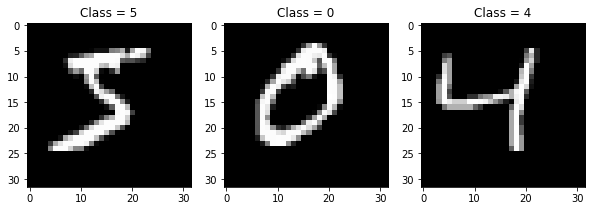

In [6]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train1[i][...,0], cmap='gray')
    plt.title('Class = {}'.format(y_train[i]))

# 3. VGG Model Build

In [7]:
def conv_block_2d(lr_conv, lr_num, par_list):
        # parameter
        filter_num = par_list[0]
        conv_size = par_list[1]
        conv_act = par_list[2]
        pool_size = par_list[3]
        # code
        for i in range(lr_num):
            lr_conv = layers.Conv2D(filter_num, conv_size, activation=None, padding='same', 
                                    kernel_initializer='he_normal')(lr_conv)
            lr_conv = layers.BatchNormalization(axis=-1)(lr_conv)
            lr_conv = layers.Activation(conv_act)(lr_conv)
        lr_pool = layers.MaxPooling2D(pool_size=pool_size)(lr_conv)
        return lr_pool

def output_block(lr_dense, block_num, dens_count, act_func, drop_rate):
    lr_dense = layers.Flatten()(lr_dense)
    for i in range(block_num):
        lr_dense = layers.Dense(dens_count[i], kernel_regularizer=None,
                                activation=act_func)(lr_dense)
        lr_dense = layers.Dropout(drop_rate)(lr_dense)
    return lr_dense

In [9]:
def VGG16_2D(par_dic):
    # parameters
    input_size = par_dic['input_size']
    conv_size = par_dic['conv_size']
    conv_act = par_dic['conv_act']
    pool_size = par_dic['pool_size']
    dens_num = par_dic['dens_num']
    dens_count = par_dic['dens_count']
    dens_act = par_dic['dens_act']
    drop_out = par_dic['drop_out']
    output_count = par_dic['output_count']
    output_act = par_dic['output_act']

    # code block
    inputs = Input(shape=(input_size, input_size, 1))
    block1 = conv_block_2d(inputs, 2, [64, conv_size, conv_act, pool_size])
    block2 = conv_block_2d(block1, 2, [128, conv_size, conv_act, pool_size])
    block3 = conv_block_2d(block2, 3, [256, conv_size, conv_act, pool_size])
    block4 = conv_block_2d(block3, 3, [512, conv_size, conv_act, pool_size])
    block5 = conv_block_2d(block4, 3, [512, conv_size, conv_act, pool_size])
    dens = output_block(block5, dens_num, dens_count, dens_act, drop_out)
    outputs = layers.Dense(output_count, activation=output_act)(dens)
    model = Model(inputs, outputs)
    return model

In [10]:
def VGG19_2D(par_dic):
    # parameters
    input_size = par_dic['input_size']
    conv_size = par_dic['conv_size']
    conv_act = par_dic['conv_act']
    pool_size = par_dic['pool_size']
    dens_num = par_dic['dens_num']
    dens_count = par_dic['dens_count']
    dens_act = par_dic['dens_act']
    drop_out = par_dic['drop_out']
    output_count = par_dic['output_count']
    output_act = par_dic['output_act']

    # code block
    inputs = Input(shape=(input_size, input_size, 1))
    block1 = conv_block_2d(inputs, 2, [64, conv_size, conv_act, pool_size])
    block2 = conv_block_2d(block1, 2, [128, conv_size, conv_act, pool_size])
    block3 = conv_block_2d(block2, 4, [256, conv_size, conv_act, pool_size])
    block4 = conv_block_2d(block3, 4, [512, conv_size, conv_act, pool_size])
    block5 = conv_block_2d(block4, 4, [512, conv_size, conv_act, pool_size])
    dens = output_block(block5, dens_num, dens_count, dens_act, drop_out)
    outputs = layers.Dense(output_count, activation=output_act)(dens)
    model = Model(inputs, outputs)
    return model

In [11]:
network_param_set = {'input_size': 32,
                     'conv_size': 3,
                     'conv_act': 'relu',
                     'pool_size': 2,
                     'dens_num': 2,
                     'dens_count': [1000,500],
                     'dens_act': 'relu',
                     'drop_out': 0.5,
                     'output_count': 10,
                     'output_act': 'softmax'}

In [12]:
model = VGG19_2D(network_param_set)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

# 4. MNIST Training

In [13]:
model.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=1e-5), metrics=['accuracy'])

In [14]:
callback_list = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
                         keras.callbacks.ModelCheckpoint(filepath=os.path.join('model.h5'),
                                                         monitor='val_loss', save_best_only=True),
                         keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

history = model.fit(x_train1, y_train1, epochs=50, batch_size=32, 
                    validation_data=(x_test1, y_test1),
                    callbacks=callback_list, shuffle=True)

Epoch 1/50
63/63 [==============================] - 16s 112ms/step - loss: 3.0584 - accuracy: 0.1224 - val_loss: 2.3253 - val_accuracy: 0.1000
Epoch 2/50
63/63 [==============================] - 5s 85ms/step - loss: 2.5760 - accuracy: 0.1702 - val_loss: 2.1800 - val_accuracy: 0.2340
Epoch 3/50
63/63 [==============================] - 5s 85ms/step - loss: 2.1948 - accuracy: 0.2669 - val_loss: 1.9411 - val_accuracy: 0.4020
Epoch 4/50
63/63 [==============================] - 5s 85ms/step - loss: 1.9742 - accuracy: 0.3185 - val_loss: 1.6402 - val_accuracy: 0.5680
Epoch 5/50
63/63 [==============================] - 5s 85ms/step - loss: 1.6340 - accuracy: 0.4375 - val_loss: 1.3751 - val_accuracy: 0.6680
Epoch 6/50
63/63 [==============================] - 5s 85ms/step - loss: 1.3528 - accuracy: 0.5228 - val_loss: 1.1570 - val_accuracy: 0.7380
Epoch 7/50
63/63 [==============================] - 5s 85ms/step - loss: 1.1563 - accuracy: 0.6151 - val_loss: 0.9987 - val_accuracy: 0.7460
Epoch 8/50
